In [1]:
from IPython.display import Markdown as md
import numpy as np
import pandas as pd

# Some Randomness, for Fun

In [2]:
import random
random.seed(0) # pick your seed

# Data

In [3]:
!pip install eurostatapiclient

In [4]:
from eurostatapiclient import EurostatAPIClient

#Set versions and formats, so far only the ones used here are availeable and call client
VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

In [5]:
%%html
<iframe src="https://ec.europa.eu/eurostat/databrowser/view/env_waspacr/default/table?lang=en" width="1000" height="800"></iframe>

In [6]:
countries_names = {'AT':'Austria', 'BE':'Belgium', 'BG':'Bulgaria', 'CY': 'Cyprus', 
                   'CZ': 'Czechia', 'DE': 'Germany', 'DK': 'Denmark', 'EE':'Estonia', 
                   'EL': 'Greece', 'ES':'Spain', 'FI':'Finland', 'FR':'France', 
                   'HR':'Croatia', 'HU':'Hungary', 'IE':'Ireland', 'IT':'Italy', 
                   'LT':'Lithuania', 'LU':'Luxembourg', 'LV':'Latvia', 'MT': 'Malta', 
                   'NL':'Netherlands', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 
                   'SE':'Sweden', 'SI':'Slovenia', 'SK':'Slovakia', 'UK':'United Kingdom'}

packaging_types = {'W150101': 'Paper and cardboard packaging',
                   'W150102': 'Plastic packaging',
                   'W150103': 'Wooden packaging',
                   'W150104': 'Metallic packaging',
                   'W150107': 'Glass packaging',
                   'W150199': 'Other packaging'}

In [7]:
par_df1 = {
    'waste': packaging_types.keys(),
    'unit': ['RT'],
    'geo': list(countries_names.keys()),
}

df1 = client.get_dataset('env_waspacr', params=par_df1).to_dataframe()

# Understand your Data Numerically

## Sneak a Peek

In [8]:
df1.sample(n=20)

,values,waste,unit,geo,time
2931,NaN,W150107,RT,PL,2002
815,8.6,W150102,RT,ES,1998
2911,75.8,W150107,RT,NL,2004
383,71.6,W150101,RT,LU,2006
2681,71.8,W150107,RT,ES,2016
900,37.3,W150102,RT,HR,2017
2039,38.2,W150104,RT,EL,2012
1913,80.5,W150104,RT,BG,2018
402,NaN,W150101,RT,LV,2003
681,59.2,W150102,RT,BG,2018


In [9]:
df1.rename(columns={'geo': 'country', 'time': 'year'}, inplace=True)
df1.drop('unit', axis=1, inplace=True)

In [10]:
df1.sample(n=20)

,values,waste,country,year
3652,NaN,W150199,SK,1997
3566,NaN,W150199,PT,1999
133,58.2,W150101,DK,1998
3356,NaN,W150199,HR,2009
1530,23.4,W150103,HU,2009
1608,NaN,W150103,LU,1999
2282,34.3,W150104,MT,2013
23,83.1,W150101,BE,1998
3084,27.3,W150199,AT,2001
3111,2.8,W150199,BE,2006


In [11]:
df1['country'] = df1['country'].map(countries_names)
df1['waste'] = df1['waste'].map(packaging_types)

In [12]:
df1.sample(n=20)

,values,waste,country,year
1306,20.6,Wooden packaging,Cyprus,2005
2100,64.4,Metallic packaging,France,2007
3172,NaN,Other packaging,Czechia,2001
494,81.8,Paper and cardboard packaging,Portugal,2007
1649,27.3,Wooden packaging,Latvia,2018
3046,55.0,Glass packaging,Slovakia,2007
2740,NaN,Glass packaging,Croatia,2009
1137,51.3,Plastic packaging,Romania,2012
3197,0.0,Other packaging,Germany,2004
1608,NaN,Wooden packaging,Luxembourg,1999


## Dimensions

In [13]:
df1.shape

(3696, 4)

## Attribute Types

In [14]:
df1.dtypes

values     float64
waste       object
country     object
year        object
dtype: object

In [15]:
df1['year'] = df1['year'].astype('int')

In [16]:
df1.dtypes

values     float64
waste       object
country     object
year         int64
dtype: object

In [17]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
dir = os.path.join('gdrive', 'MyDrive', 'EuroStat', '01 - Intro to Python for Data Science')
data_dir = os.path.join(dir, 'data')
os.makedirs(data_dir, exist_ok=True)
filename = os.path.join(data_dir, 'env_waspacr.csv')
df1.to_csv(filename, index=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Descripive Statistics

In [18]:
df1.describe()

,values,year
count,2911.000000,3696.000000
mean,47.602061,2007.500000
std,30.128591,6.345147
min,0.000000,1997.000000
25%,22.600000,2002.000000
50%,48.400000,2007.500000
75%,73.600000,2013.000000
max,174.200000,2018.000000


In [19]:
df1[df1['values'] > 100]

,values,waste,country,year
237,101.2,Paper and cardboard packaging,Finland,2014
238,111.6,Paper and cardboard packaging,Finland,2015
239,114.6,Paper and cardboard packaging,Finland,2016
240,116.1,Paper and cardboard packaging,Finland,2017
241,116.0,Paper and cardboard packaging,Finland,2018
1733,131.5,Wooden packaging,Portugal,2014
1735,103.4,Wooden packaging,Portugal,2016
1773,167.2,Wooden packaging,Sweden,2010
1774,136.1,Wooden packaging,Sweden,2011
1927,116.7,Metallic packaging,Cyprus,2010


## Class Distribution

In [20]:
df1['value_bin'] = df1['values'].map(lambda v : round(v, ndigits=-1))
df1.sample(n=10)

,values,waste,country,year,value_bin
2148,83.5,Metallic packaging,Hungary,2011,80.0
3109,1.7,Other packaging,Belgium,2004,0.0
2443,23.3,Metallic packaging,United Kingdom,1998,20.0
2910,76.2,Glass packaging,Netherlands,2003,80.0
2073,49.9,Metallic packaging,Finland,2002,50.0
2458,57.4,Metallic packaging,United Kingdom,2013,60.0
2797,46.9,Glass packaging,Italy,2000,50.0
1963,79.5,Metallic packaging,Germany,2002,80.0
1706,23.1,Wooden packaging,Poland,2009,20.0
674,39.2,Plastic packaging,Bulgaria,2011,40.0


In [21]:
df1.groupby(by='value_bin').size()

value_bin
0.0      333
10.0     176
20.0     301
30.0     307
40.0     266
50.0     233
60.0     311
70.0     302
80.0     350
90.0     244
100.0     72
110.0      2
120.0      7
130.0      2
140.0      2
170.0      3
dtype: int64

## Moments

In [22]:
df1['values'].mean()

47.60206114737202

In [23]:
df1['values'].std()

30.12859134391721

In [24]:
df1['values'].skew()

0.05112247319191034

## Correlation

In [25]:
df2 = df1.pivot(index='year', columns=['country', 'waste'], values='values')
df2

country,Austria,Belgium,Bulgaria,Cyprus,Czechia,Germany,Denmark,Estonia,Greece,Spain,Finland,France,Croatia,Hungary,Ireland,Italy,Lithuania,Luxembourg,Latvia,Malta,Netherlands,Poland,Portugal,Romania,Sweden,Slovenia,Slovakia,United Kingdom,Austria,Belgium,Bulgaria,Cyprus,Czechia,Germany,Denmark,Estonia,Greece,Spain,Finland,France,...,Lithuania,Luxembourg,Latvia,Malta,Netherlands,Poland,Portugal,Romania,Sweden,Slovenia,Slovakia,United Kingdom,Austria,Belgium,Bulgaria,Cyprus,Czechia,Germany,Denmark,Estonia,Greece,Spain,Finland,France,Croatia,Hungary,Ireland,Italy,Lithuania,Luxembourg,Latvia,Malta,Netherlands,Poland,Portugal,Romania,Sweden,Slovenia,Slovakia,United Kingdom
waste,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Paper and cardboard packaging,Plastic packaging,Plastic packaging,Plastic packaging,Plastic packaging,Plastic packaging,Plastic packaging,Plastic packaging,Plastic packaging,Plastic packaging,Plastic packaging,Plastic packaging,Plastic packaging,...,Glass packaging,Glass packaging,Glass packaging,Glass packaging,Glass packaging,Glass packaging,Glass packaging,Glass packaging,Glass packaging,Glass packaging,Glass packaging,Glass packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging,Other packaging
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1997,85.0,77.5,NaN,NaN,NaN,87.6,47.3,NaN,67.3,52.4,56.5,59.2,NaN,NaN,16.6,36.3,NaN,45.1,NaN,NaN,64.9,NaN,NaN,NaN,66.2,NaN,NaN,41.2,20.0,25.3,NaN,NaN,NaN,61.1,6.1,NaN,3.1,7.3,10.0,6.5,...,NaN,71.4,NaN,NaN,75.5,NaN,NaN,NaN,75.6,NaN,NaN,19.5,53.6,11.3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1998,84.3,83.1,NaN,NaN,NaN,88.2,58.2,NaN,66.3,52.2,57.1,61.0,NaN,NaN,14.9,37.1,NaN,48.8,NaN,NaN,69.7,NaN,47.6,NaN,84.4,NaN,NaN,47.4,26.8,26.2,NaN,NaN,NaN,59.1,6.7,NaN,3.6,8.6,10.2,8.0,...,NaN,80.3,NaN,NaN,85.0,NaN,41.5,NaN,83.6,NaN,NaN,22.9,37.5,25.9,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.6,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1999,87.7,69.7,NaN,NaN,NaN,87.2,59.3,NaN,66.7,53.7,60.6,59.0,NaN,NaN,14.1,39.5,NaN,34.9,NaN,NaN,71.3,NaN,52.5,NaN,72.4,NaN,NaN,49.4,25.0,24.4,NaN,NaN,NaN,58.6,11.0,NaN,3.3,14.4,12.9,9.0,...,NaN,76.0,NaN,NaN,80.2,NaN,43.7,NaN,83.9,NaN,NaN,30.1,42.9,19.7,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2000,86.9,82.1,NaN,NaN,NaN,90.2,62.0,NaN,67.4,58.2,61.9,59.0,NaN,NaN,16.6,45.5,NaN,36.7,NaN,NaN,70.9,NaN,46.7,NaN,62.6,NaN,NaN,50.3,26.2,25.5,NaN,NaN,NaN,53.4,12.5,NaN,3.1,17.2,14.1,11.2,...,NaN,82.6,NaN,NaN,80.2,NaN,38.4,NaN,86.1,NaN,NaN,38.6,37.5,25.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.9,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2001,81.4,85.8,NaN,NaN,NaN,91.0,64.9,NaN,67.6,63.8,58.0,61.5,NaN,NaN,24.2,52.1,NaN,59.4,NaN,NaN,65.2,Na

In [26]:
df2['Luxembourg']

waste,Paper and cardboard packaging,Plastic packaging,Wooden packaging,Metallic packaging,Glass packaging,Other packaging
year,,,,,,
1997,45.1,6.2,NaN,22.2,71.4,0.0
1998,48.8,9.3,NaN,10.9,80.3,0.0
1999,34.9,26.4,NaN,42.3,76.0,0.0
2000,36.7,35.9,NaN,68.1,82.6,0.0
2001,59.4,33.7,NaN,76.7,91.1,10.7
2002,60.2,28.3,NaN,79.1,83.5,19.5
2003,63.9,23.5,37.6,69.8,90.4,0.0
2004,64.5,34.5,35.7,66.4,93.5,0.0
2005,69.3,29.6,52.9,63.3,91.8,4.5


In [27]:
df2['Luxembourg'].corr(method='pearson')

waste,Paper and cardboard packaging,Plastic packaging,Wooden packaging,Metallic packaging,Glass packaging,Other packaging
waste,,,,,,
Paper and cardboard packaging,1.000000,0.462146,-0.352496,0.767240,0.899148,-0.133944
Plastic packaging,0.462146,1.000000,0.058325,0.813090,0.699328,0.047486
Wooden packaging,-0.352496,0.058325,1.000000,-0.335869,-0.006770,0.304515
Metallic packaging,0.767240,0.813090,-0.335869,1.000000,0.857299,0.069655
Glass packaging,0.899148,0.699328,-0.006770,0.857299,1.000000,-0.158897
Other packaging,-0.133944,0.047486,0.304515,0.069655,-0.158897,1.000000


# Understand your Data Graphically

In [28]:
import matplotlib.pyplot as plt

## Univariate Plots

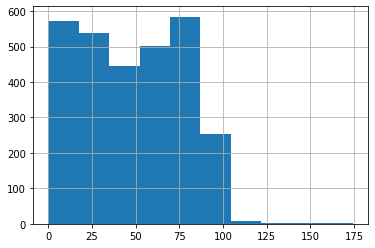

In [29]:
df1['values'].hist()

In [30]:
df3 = df1.pivot(columns='year',
                values='values')
df3.describe()

year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,69.000000,72.000000,74.000000,76.000000,75.000000,74.000000,101.000000,144.000000,159.000000,156.000000,156.000000,155.00000,153.000000,156.000000,157.000000,163.000000,162.000000,162.000000,162.000000,162.000000,162.000000,161.000000
mean,36.101449,38.754167,39.894595,41.318421,45.665333,47.101351,41.354455,36.940972,37.621384,41.259615,44.712179,47.35871,49.977124,51.294872,52.233121,51.336810,51.659259,52.766667,52.891358,54.596296,54.152469,54.257764
std,27.252682,28.199280,26.249941,26.095556,25.816711,25.245835,29.044891,28.538624,28.305779,29.254613,30.311044,30.73425,30.488636,32.459692,30.178559,29.543914,29.986901,30.070239,30.107190,30.577926,30.968724,30.791004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.300000,12.650000,18.525000,21.250000,24.250000,25.300000,17.400000,12.075000,13.250000,16.425000,18.925000,22.25000,24.600000,27.000000,29.500000,29.150000,28.525000,29.650000,28.650000,31.050000,31.075000,30.000000
50%,33.800000,37.150000,37.550000,37.950000,43.100000,49.650000,38.000000,34.150000,35.000000,38.350000,41.750000,47.00000,50.500000,51.300000,58.000000,54.200000,55.400000,58.200000,60.400000,59.900000,60.250000,59.200000
75%,61.100000,61.575000,60.275000,61.925000,66.400000,66.575000,62.800000,58.775000,59.750000,64.200000,70.150000,72.15000,76.100000,75.475000,75.500000,76.750000,78.075000,78.575000,77.200000,80.400000,79.475000,80.000000
max,87.600000,88.200000,87.700000,97.400000,91.100000,92.800000,97.800000,103.600000,99.900000,115.100000,128.400000,142.50000,174.200000,174.200000,136.100000,100.000000,100.000000,131.500000,111.600000,114.600000,119.800000,117.500000


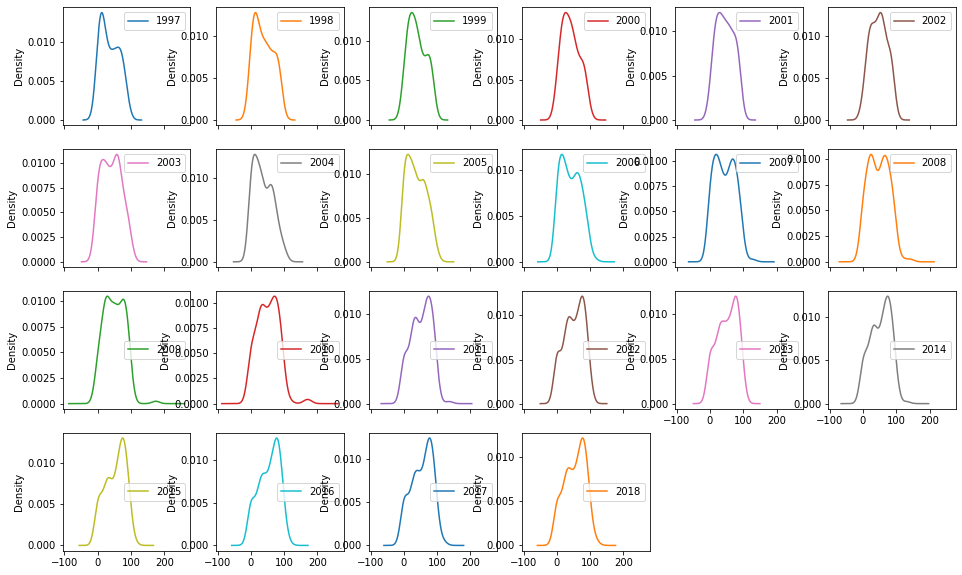

In [31]:
df3.plot(kind='kde',
         legend=True,
         subplots=True,
         layout=(4, 6),
         figsize=(16, 10))
plt.show()

### ❓ Exercise

In [32]:
md(f"##❓ Create a histogram grid that uses the same axis range across the years")

##❓ Create a histogram grid that uses the same axis range across the years

Hint: help(df3.plot)

## Multivariate Plots

In [33]:
df4 = df1.pivot(index=['year', 'country'], columns=['waste'], values='values')
df4

waste                Glass packaging  ...  Wooden packaging
year country                          ...                  
1997 Austria                    76.5  ...              14.0
     Belgium                    70.1  ...              52.8
     Bulgaria                    NaN  ...               NaN
     Croatia                     NaN  ...               NaN
     Cyprus                      NaN  ...               NaN
...                              ...  ...               ...
2018 Slovakia                   68.6  ...              53.4
     Slovenia                  104.0  ...              25.1
     Spain                      76.8  ...              67.0
     Sweden                     92.7  ...              51.1
     United Kingdom             68.5  ...              35.2

[616 rows x 6 columns]

In [34]:
correlations = df4.corr(method='pearson')
correlations

waste,Glass packaging,Metallic packaging,Other packaging,Paper and cardboard packaging,Plastic packaging,Wooden packaging
waste,,,,,,
Glass packaging,1.000000,0.498686,0.017796,0.430824,0.390818,0.266036
Metallic packaging,0.498686,1.000000,-0.115840,0.602707,0.486487,0.249944
Other packaging,0.017796,-0.115840,1.000000,-0.035849,0.129798,-0.130472
Paper and cardboard packaging,0.430824,0.602707,-0.035849,1.000000,0.538271,0.126454
Plastic packaging,0.390818,0.486487,0.129798,0.538271,1.000000,0.099165
Wooden packaging,0.266036,0.249944,-0.130472,0.126454,0.099165,1.000000


## Matshow

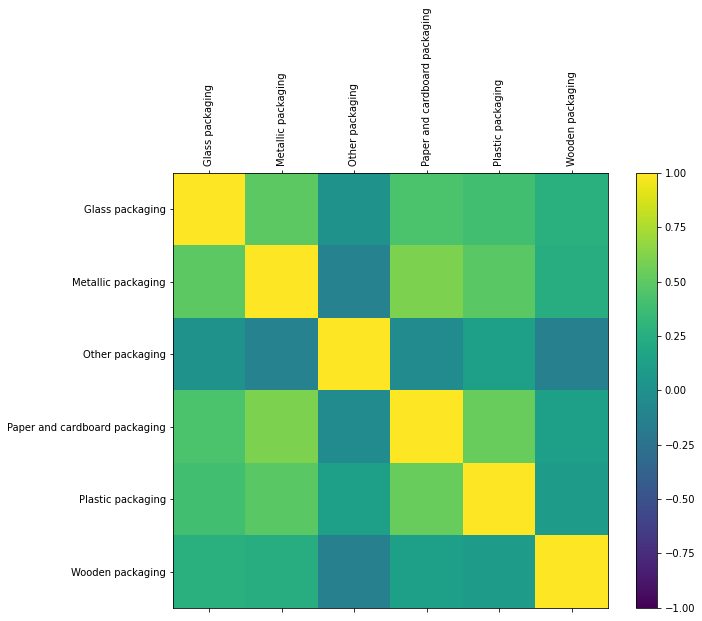

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df4.columns, rotation=90)
ax.set_yticklabels(df4.columns)
plt.show()

## Scatterplot Matrix

In [36]:
from pandas.plotting import scatter_matrix

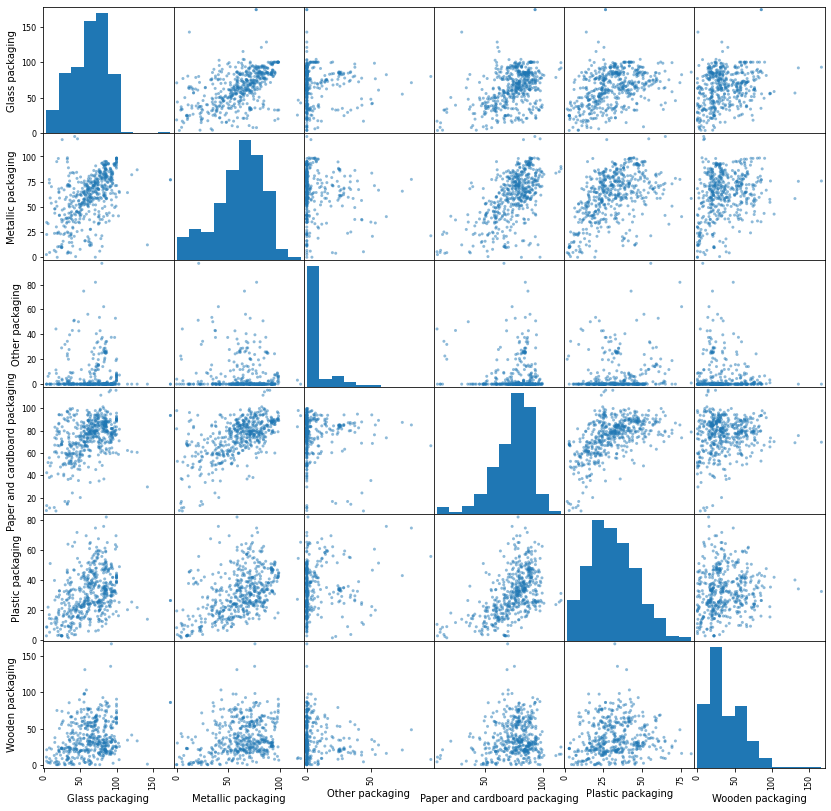

In [37]:
scatter_matrix(df4, figsize=(14, 14))
plt.show()